In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/diabetes_prediction_dataset.csv')

## Análisis Exploratorio de Datos

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Descripción de los datos

gender: Esta columna probablemente contiene el género del paciente.

age: La edad del paciente.

hypertension: Esta columna indica si el paciente tiene hipertensión (alta presión sanguínea).

heart_disease: Esta columna indica si el paciente tiene alguna enfermedad cardíaca.

smoking_history: Esta columna indica si el paciente ha fumado en el pasado.

bmi: El índice de masa corporal (BMI, por sus siglas en inglés) del paciente.

HbA1c_level: El nivel de hemoglobina glucosilada (HbA1c) en la sangre del paciente. Esta es una medida que indica el nivel promedio de azúcar en sangre de una persona durante los últimos 2 a 3 meses.

blood_glucose_level: El nivel actual de glucosa en sangre del paciente. Esta medida puede variar a lo largo del día y dependiendo de cuándo fue la última vez que la persona comió.

diabetes: Esta columna indica si el paciente tiene diabetes.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### Análisis Uni-variable

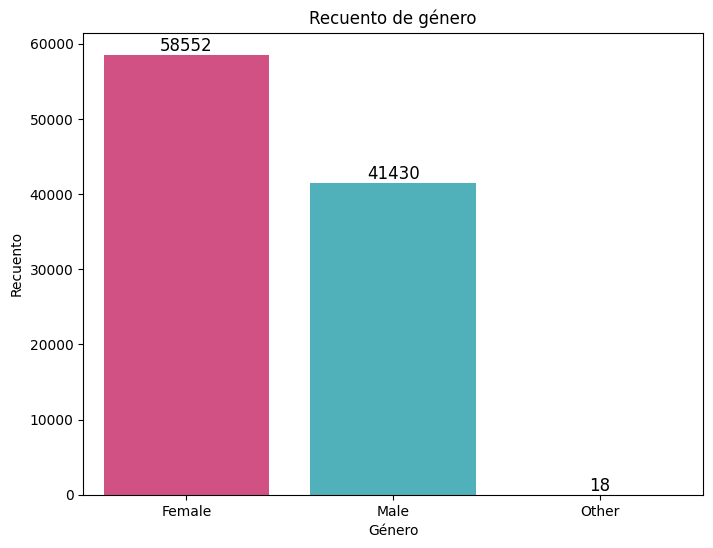

In [5]:
# Bar plot de la variable gender
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax = sns.countplot(x='gender', data=df, palette=['#e63c80', '#40c0cb','#605951'], order=df['gender'].value_counts(ascending=False).index)
plt.title('Recuento de género')
plt.xlabel('Género')
plt.ylabel('Recuento')

values = df['gender'].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels = values, label_type='edge', fontsize=12)
    
plt.show()

In [32]:
# Tabla de contingencia gender vs diabetes
pd.crosstab(df['gender'], df['diabetes'], normalize='index', margins=True)*100

diabetes,0,1
gender,,
Female,92.381131,7.618869
Male,90.251026,9.748974
Other,100.000000,0.000000
All,91.500000,8.500000


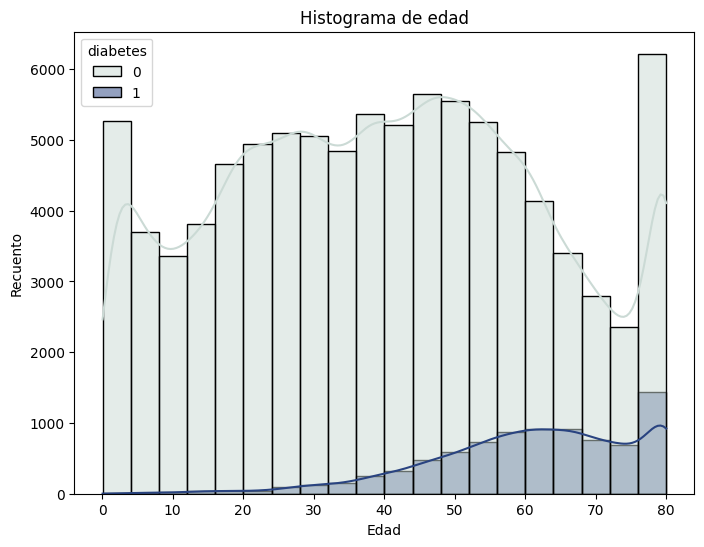

In [19]:
# Histograma de la variable age
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax = sns.histplot(x='age', data=df, bins=20, kde=True, palette=['#cbdad5', '#294380'], hue='diabetes')
plt.title('Histograma de edad')
plt.xlabel('Edad')
plt.ylabel('Recuento')

plt.show()

In [30]:
# Tabla de contingencia entre la variable hypertension y diabetes
pd.crosstab(df['hypertension'], df['diabetes'], normalize='index', margins=True)*100

diabetes,0,1
hypertension,,
0,93.069232,6.930768
1,72.104208,27.895792
All,91.500000,8.500000


In [29]:
# Tabla de contingencia entre la variable heart_disease y diabetes
pd.crosstab(df['heart_disease'], df['diabetes'], normalize='index', margins=True)*100

diabetes,0,1
heart_disease,,
0,92.470174,7.529826
1,67.858955,32.141045
All,91.500000,8.500000


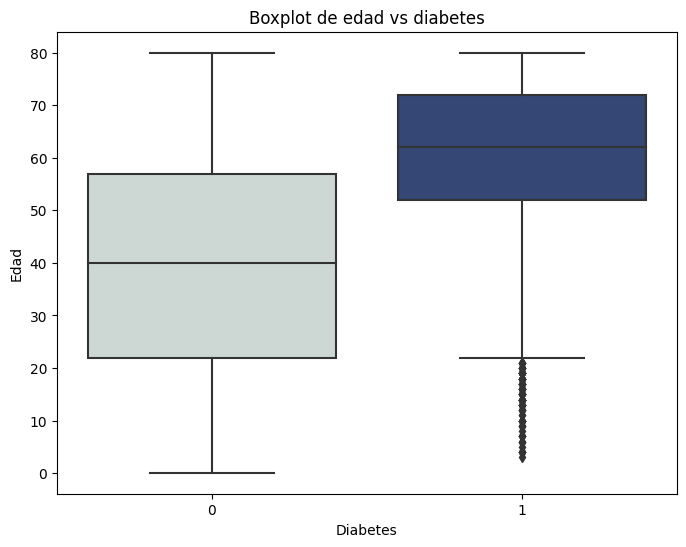

In [31]:
# Boxplot age vs diabetes
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax = sns.boxplot(x='diabetes', y='age', data=df, palette=['#cbdad5', '#294380'])
plt.title('Boxplot de edad vs diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Edad')

plt.show()

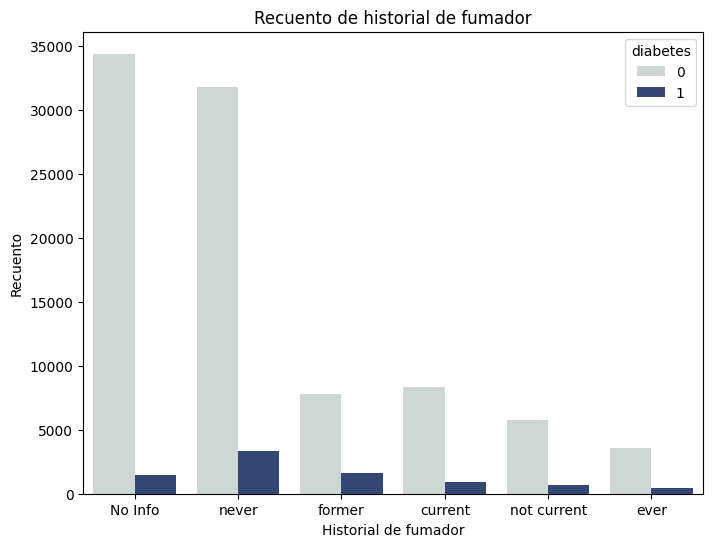

In [21]:
# Grafico de barras para la variable smoking_history y diabetes
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax = sns.countplot(x='smoking_history', data=df, palette=['#cbdad5', '#294380'], order=df['smoking_history'].value_counts(ascending=False).index, hue='diabetes')
plt.title('Recuento de historial de fumador')
plt.xlabel('Historial de fumador')
plt.ylabel('Recuento')

plt.show()

In [13]:
# Tabla de contingencia entre las variables smoking_history y diabetes en porcentajes
pd.crosstab(index=df['smoking_history'], columns=df['diabetes'], normalize='index')*100

diabetes,0,1
smoking_history,,
No Info,95.940362,4.059638
current,89.791083,10.208917
ever,88.211788,11.788212
former,82.998289,17.001711
never,90.465878,9.534122
not current,89.297348,10.702652
